In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
# load model without classifier layers
model = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)

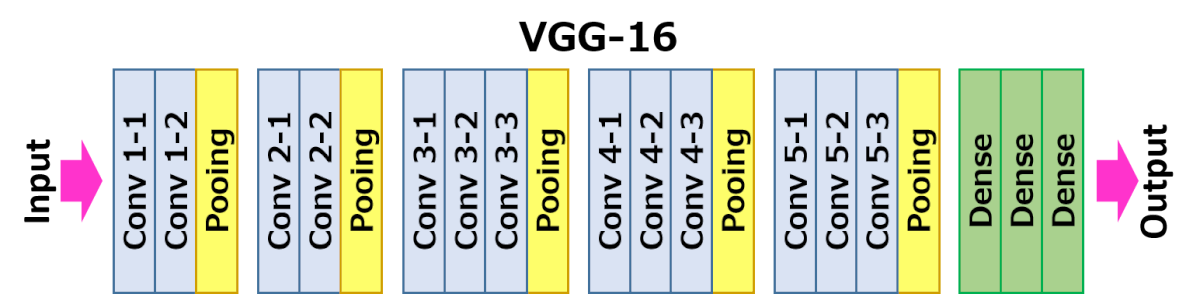

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# add new classifier layers
flat1 = Flatten()(model.output)
class1 = Dense(100, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

    
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/cats_dogs/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/cats_dogs/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch= 1600 // batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps= 400 // batch_size )

Epoch 1/3
100/100 [==============================] - 24s 240ms/step - loss: 0.1494 - accuracy: 0.9420 - val_loss: 0.1702 - val_accuracy: 0.9250
Epoch 2/3
100/100 [==============================] - 24s 236ms/step - loss: 0.1409 - accuracy: 0.9470 - val_loss: 0.1852 - val_accuracy: 0.9225
Epoch 3/3
100/100 [==============================] - 24s 236ms/step - loss: 0.1154 - accuracy: 0.9521 - val_loss: 0.1929 - val_accuracy: 0.9250


In [ ]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg


{'cat.jpg': b'\xff\xd8\xff\xe1\x00\x18Exif\x00\x00II*\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00W\x00\x00\xff\xe1\x04Xhttp://ns.adobe.com/xap/1.0/\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.6-c145 79.163499, 2018/08/13-16:40:22        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:photoshop="http://ns.adobe.com/photoshop/1.0/" xmpMM:DocumentID="xmp.did:B41ECA05C29B11E980868988A526EDF3" xmpMM:InstanceID="xmp.iid:B41ECA04C29B11E980868988A526EDF3" xmp:CreatorTool="Adobe Photoshop CC 2019 (Macintosh)" photoshop:AuthorsPosition="Contributor"> <xmpMM:DerivedFrom stRef:instanceID="AB9A2949EEA49CE4D9CDAE5109

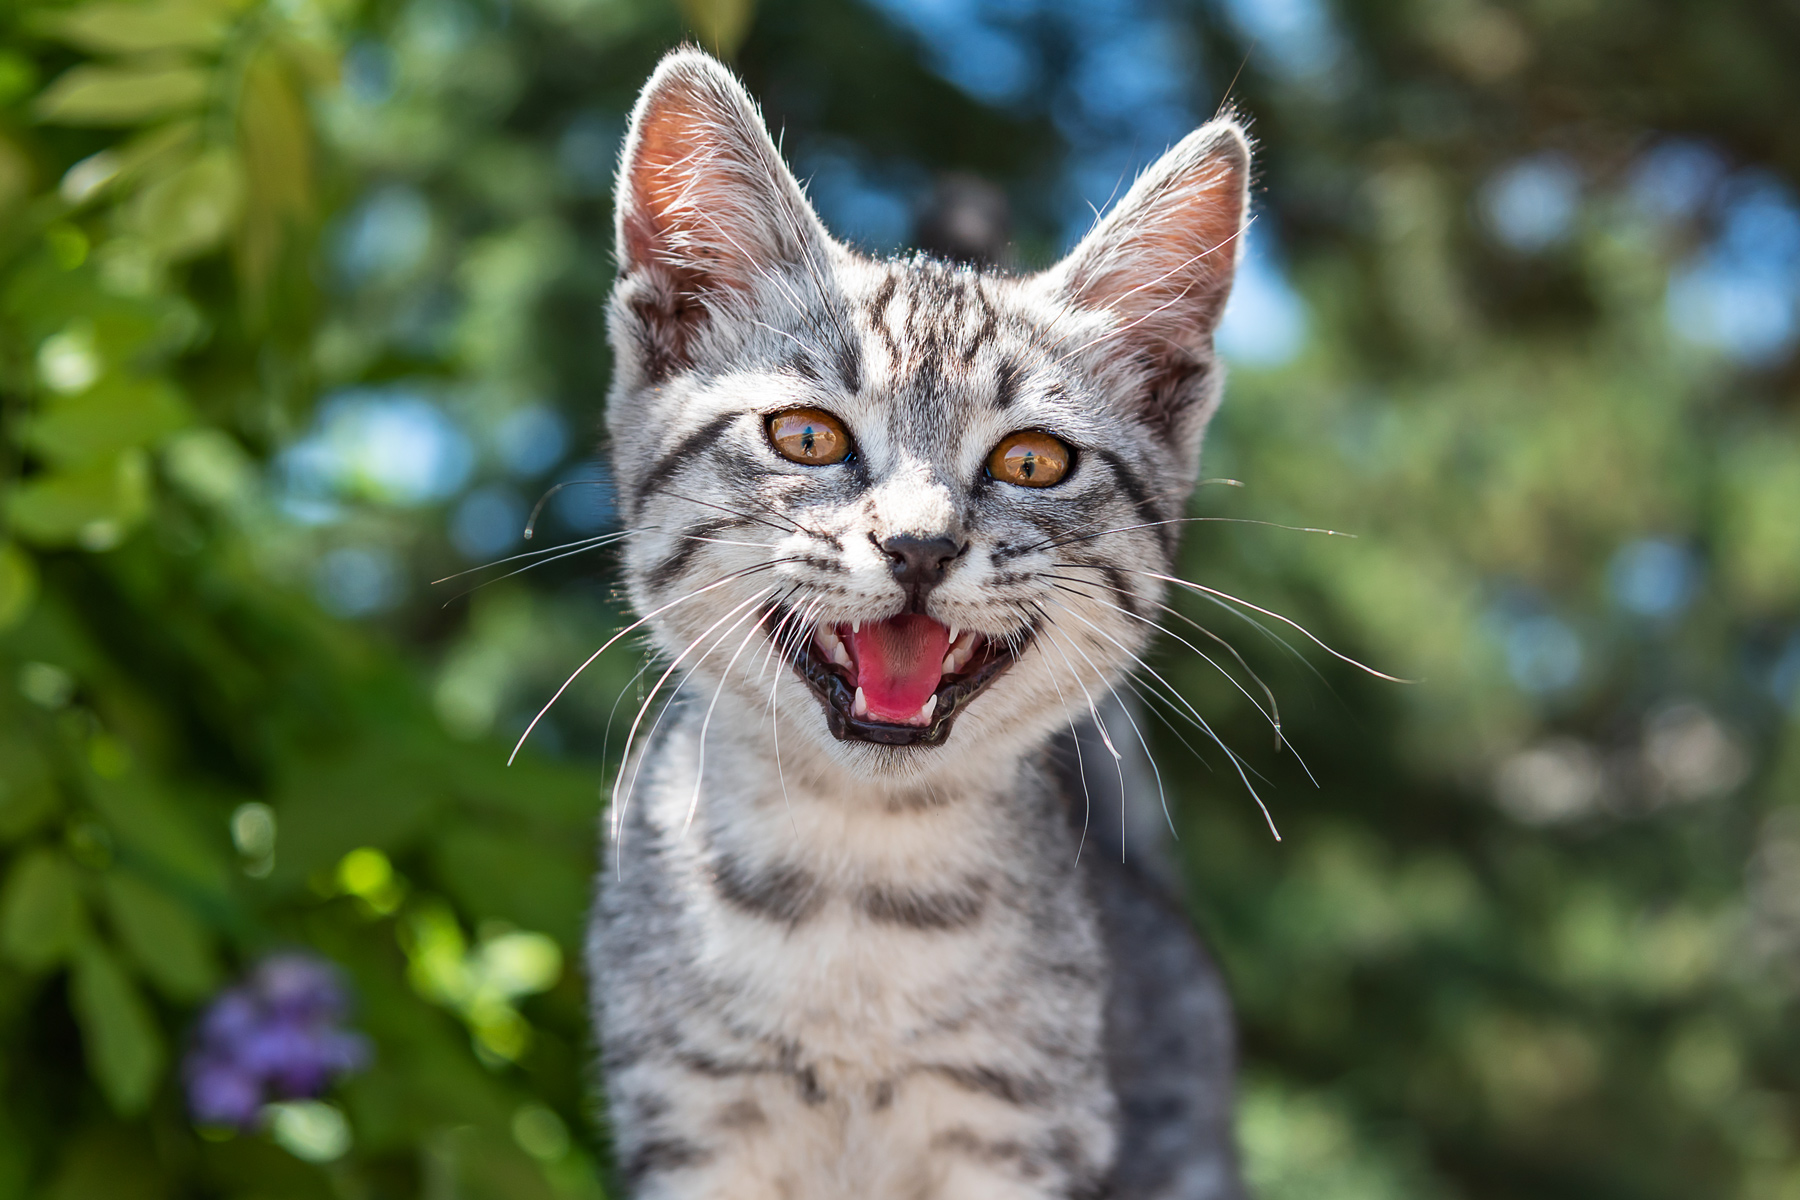

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('cat.jpg')  
x = img_to_array(img.resize([224,224]))  # this is a Numpy array with shape (224, 224, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 224, 224,3), np.expand_dims
img

In [ ]:
import numpy as np
if (np.argmax(model.predict(x))==0):
    print ("It is a CAT")
else:
    print ("It is a DOG")

It is a CAT


In [ ]:
model.predict(x)